<a href="https://colab.research.google.com/github/mithun-martin/MACHINE-LEARNING/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap


In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data[:,:2]
y = iris.target
class_names = iris.target_names

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:

# 🔍 Why We Use This (StandardScaler):
# This code scales the features so that each one has:

# Mean = 0

# Standard deviation = 1

# This process is called standardization (Z-score normalization).

# 🤔 Why Is This Important in SVM?
# SVMs calculate distances and margins between data points and the decision boundary. If the features are on very different scales (e.g., one feature ranges from 1–1000 and another from 0–1), it messes up those distance calculations.

# For example:

# Feature 1 (sepal length) = 4.3 to 7.9

# Feature 2 (sepal width) = 2.0 to 4.4

# Without scaling, the SVM might treat one feature as more important just because it has a bigger range.

# ✅ That’s why we do:
# scaler.fit_transform(X_train): Learn the scale from the training set and apply it.

# scaler.transform(X_test): Apply the same scaling to the test set (don’t "fit" again).

# ⚠️ Never fit on the test data — this would leak information from the test set into the mode

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = SVC(kernel='rbf', C=1.0, gamma='auto', decision_function_shape='ovr')  # Supports multi-class
model.fit(X_train, y_train)

SVC(gamma='auto')

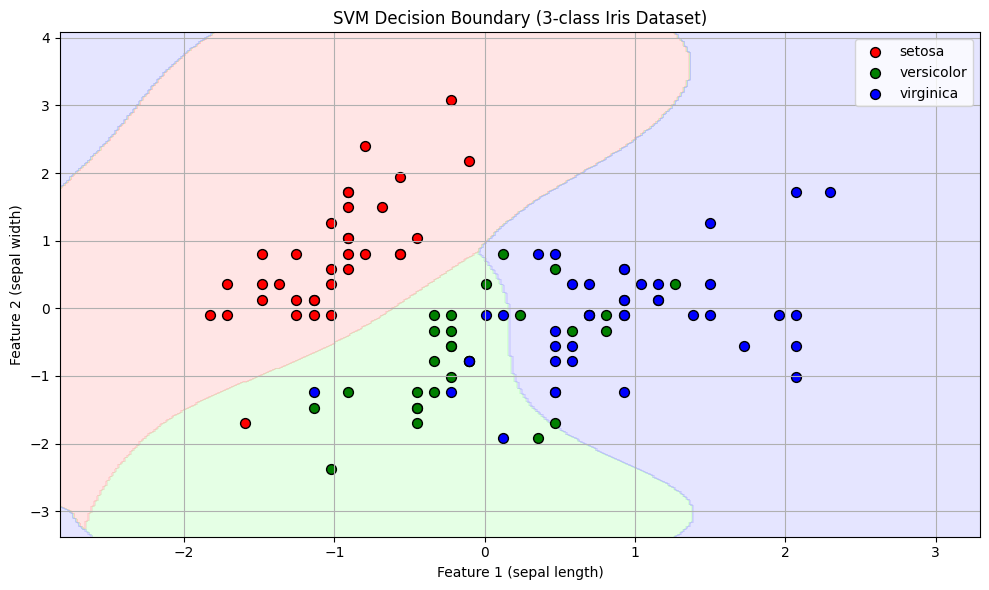

In [10]:

# Create a mesh grid
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and data points
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_points = ['red', 'green', 'blue']

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

# Scatter plot of actual data
for i, color in zip(range(3), cmap_points):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1],
                label=class_names[i], edgecolor='k', c=color, s=50)

plt.title("SVM Decision Boundary (3-class Iris Dataset)")
plt.xlabel("Feature 1 (sepal length)")
plt.ylabel("Feature 2 (sepal width)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()